<a href="https://colab.research.google.com/github/ahmetnihat/ses_analizi/blob/main/Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program Gereklilikleri
Program 3 adımdan oluşmaktadır.
1-> insan sesiyle hayvan sesinin sınıflandırılması.
2-> Eğer insan sesiyse türünün belirlenmesi(nefes sesi, konuşma sesi, öksürük sesi gibi)
3->Eğer hayvan sesiyse hayvan türünün belirlenmesi(kedi, köpek)

## Başlarken


###İMPORTLAR

In [ ]:
!pip install joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sbn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import datasets, svm, metrics 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,recall_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn.feature_selection
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay
import joblib



### İnsan mı?

In [ ]:
dataFrame = pd.read_csv('/content/drive/MyDrive/csvler/librosasonmfcc127/librosa40nitelikhuman200.csv')
dataFrame = dataFrame.drop("Unnamed: 0", axis=1)
dataFrame = dataFrame.drop("Unnamed: 0.1", axis=1)
dataFrame= dataFrame.replace(to_replace ="human2",value =1)
#dataFrame= dataFrame.replace(to_replace ="human",value =1)
dataFrame= dataFrame.replace(to_replace ="oksurme",value =1)
dataFrame= dataFrame.replace(to_replace ="nefes",value =1)
dataFrame= dataFrame.replace(to_replace ="ciglik",value =1)
dataFrame= dataFrame.replace(to_replace ="dogs",value =5)
dataFrame= dataFrame.replace(to_replace ="cats",value =5)

In [ ]:
dataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,Duygu
0,-273.31912,124.515820,-42.301212,61.784035,-16.230396,41.390820,-13.816267,20.597937,-3.271545,11.048037,7.057570,-3.676232,6.633487,-8.980494,12.618555,-5.519738,8.346714,-5.004886,5.081195,-0.371369,0.653386,2.136835,-3.649660,6.193373,-4.211031,6.463951,-3.448202,4.002786,-0.565005,2.703055,1.730249,-1.214390,3.459827,-2.150386,4.143867,-2.217034,2.471958,-2.137485,1.494965,-0.800059,...,0.796429,-0.182416,0.256530,0.136644,-0.003028,0.308301,-0.343237,0.239103,-0.511328,0.191978,-0.436051,-0.159827,-0.252281,0.089238,0.449229,0.372804,0.468110,0.016228,0.197435,-0.395075,0.076685,0.050735,0.038830,-0.155067,-0.166392,-0.375096,-0.206102,0.130592,-0.029781,-0.147969,-0.093749,0.266813,-0.002094,-0.058204,-0.238205,0.153819,-0.152223,-0.124390,-0.033229,5
1,-370.46650,118.297240,12.055739,15.983206,16.898142,-1.128043,-7.200597,-2.861758,-13.110901,-12.339884,-1.653930,-9.342198,-11.906274,-7.098718,-9.608955,-9.242673,-5.124139,-6.686597,-7.851543,-8.323053,-6.084709,-5.679012,-7.193593,-3.566275,-5.742027,-6.415044,-3.884711,-6.117122,-5.436834,-3.729037,-2.810735,-1.863133,-2.922745,-0.901245,-0.189989,-1.840654,-1.172403,-3.682826,-2.730109,-0.089853,...,-0.087777,0.348274,-0.267027,-0.920184,-0.233017,-1.051931,-0.929779,-0.108409,-0.273637,0.016141,-0.552345,-0.723033,-0.294011,-0.419842,0.307758,0.064983,-0.677757,-0.997929,-1.519820,-0.760580,-0.365429,-0.347812,-0.055872,-0.711359,-0.631008,0.057093,0.311038,0.272184,-0.327448,-0.397818,-0.178957,0.045532,0.507973,0.070648,-0.015582,0.334819,0.277418,0.271589,-0.201193,5
2,-261.01425,68.592940,-68.434715,57.709450,-30.124811,17.513027,3.363291,11.571770,20.188723,26.534320,28.560873,8.683685,6.403881,-19.294655,-3.021282,7.622445,13.059220,1.393409,3.164120,21.346397,8.620008,-4.470624,-1.361741,5.988468,-2.476723,1.397181,10.426390,8.876681,0.711813,6.053598,5.976269,-4.834197,-0.056922,1.533594,-1.211875,1.858350,4.126156,-0.454451,1.121802,-2.397893,...,-0.256128,-0.183761,0.279925,-0.773994,-0.690241,-0.894491,-1.102064,-1.834586,-2.040775,0.055303,-1.189395,-1.593224,0.066786,-0.943414,-0.298192,-0.433134,-0.721036,-0.000181,-0.492151,-0.436395,0.188406,0.807988,0.440543,0.220551,0.179415,0.689293,0.738329,-0.079440,0.494343,0.554314,0.241723,-0.123639,0.144153,0.395776,0.099491,0.387946,0.152910,0.402486,0.230521,5
3,-316.01020,130.950800,-19.625652,37.887035,-7.202529,14.094850,-9.078204,3.250739,-1.697231,-0.231109,3.231752,-3.216666,1.589842,-9.186467,-0.086110,-5.722125,-0.044563,-5.097544,-2.049219,-0.262752,-4.298661,-0.903559,-3.107972,2.539897,-3.406620,2.031603,1.777670,0.593024,0.880294,0.854433,-0.232972,-3.476567,1.689636,-2.007812,0.453130,-0.206102,-0.865390,-0.207243,-1.031463,-1.709890,...,0.114200,0.315061,-0.153918,-0.377309,-0.067494,-0.232756,-0.507425,-0.840738,-0.363996,-0.305458,-0.197313,-0.374062,-0.703524,-0.671137,-0.520857,-0.607859,-0.745489,-0.751489,-0.508783,-0.109755,-0.183294,0.265209,0.752855,0.694843,0.154588,0.206342,0.463107,0.152187,0.345198,0.247717,0.017929,-0.251179,-0.390338,-0.187204,-0.150450,-0.100102,-0.136646,-0.060848,-0.034616,5
4,-217.02348,89.007820,-41.172560,74.662580,-14.939281,32.061150,-14.686216,30.695140,-4.998136,-4.557982,8.213158,3.327260,28.405458,10.376047,27.600664,7.678345,-13.009889,-16.631609,24.283860,2.176965,-15.696815,1.880880,-4.142185,5.460869,6.597651,14.204001,-0.651714,8.580262,1.494783,-9.275571,-1.931665,-0.164059,-2.683624,-4.870162,3.725859,-4.646425,4.938212,5.256506,0.568936,1.025251,...,0.995052,0.656881,0.131439,0.313840,-0.532094,0.902842,-0.927841,0.025129,-1.022899,0.347261,-0.636574,-0.212175,0.687250,-1.548976,0.845093,-0.383817,-0.286973,0.011176,-0.041197,-0.523026,-0.432532,0.183105,0.341826,0.616416,0.162

##### KNN

In [ ]:
knn = ["Duygu","0","1","2","3","4","6","7","8","9","15","16","17","18","21","23","24","34","40","47","53","57","62","65","66","72","73","80","83","84","90","94","96","99","101","104","105","112","115","121","123"]

In [ ]:
dataFrame = dataFrame.loc[:,knn]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[0.53514541, 0.59024579, 0.48104941, ..., 0.56176773, 0.44174787,
        0.4974199 ],
       [0.42989188, 0.40069507, 0.63284849, ..., 0.64379971, 0.53123865,
        0.52652569],
       [0.74248781, 0.63640766, 0.66672188, ..., 0.83258536, 0.82391792,
        0.6624535 ],
       ...,
       [0.6253987 , 0.        , 0.02590612, ..., 0.6537326 , 0.54733994,
        0.61058761],
       [0.28321634, 0.58449475, 0.81814381, ..., 0.7735383 , 0.85993309,
        0.74077661],
       [0.44660058, 0.45970873, 0.52802457, ..., 0.49615709, 0.38380871,
        0.68197826]])

--------------------------- KNN n=3 ------------------------------------
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       193
           5       0.83      0.74      0.78        78

    accuracy                           0.88       271
   macro avg       0.86      0.84      0.85       271
weighted avg       0.88      0.88      0.88       271

Confusion Matrix
[[181  12]
 [ 20  58]]
Accuracy Score
0.8819188191881919
Validation Score Mean
0.8560269360269361
Validation Sonuçları
[0.87272727 0.85185185 0.83333333 0.85185185 0.87037037]


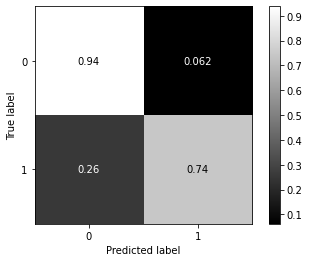

In [ ]:
print("--------------------------- KNN n=3 ------------------------------------")

model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insanmi/knn.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')


##### Gauss Bayes

In [ ]:
gauss = ["Duygu","0", "1","3", "4", "10", "91"]

In [ ]:
dataFrame = dataFrame.loc[:,gauss]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------GaussianNB ------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       193
           5       0.79      0.64      0.71        78

    accuracy                           0.85       271
   macro avg       0.83      0.79      0.80       271
weighted avg       0.84      0.85      0.84       271

Confusion Matrix
[[180  13]
 [ 28  50]]
Accuracy Score
0.8487084870848709
Validation Score Mean
0.8377104377104377
Validation Sonuçları
[0.81818182 0.88888889 0.7962963  0.83333333 0.85185185]


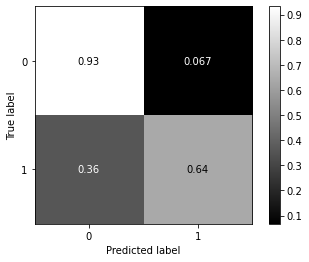

In [ ]:
print("---------------------------GaussianNB ------------------------------------")

model = GaussianNB().fit(x_train, y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insanmi/gauss.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### log reg

In [ ]:
lgreg = ["Duygu","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","16","17","19","20","21","22","23","24","29","31","32","34","37","39","42","44","45","51","57","58","59","61","62","64","66","72","74","75","76","78","79","80","82","84","85","86","88","91","102","106","108","112","115","116","123","124","125","126","127"]

In [ ]:
dataFrame = dataFrame.loc[:,lgreg]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------Logistic Regression ------------------------------------
[[0.66137845 0.33862155]
 [0.69443372 0.30556628]
 [0.95203321 0.04796679]
 [0.92914092 0.07085908]
 [0.65034897 0.34965103]
 [0.49953715 0.50046285]
 [0.92979291 0.07020709]
 [0.73122701 0.26877299]
 [0.65645518 0.34354482]
 [0.69742009 0.30257991]
 [0.81559822 0.18440178]
 [0.8478756  0.1521244 ]
 [0.96154068 0.03845932]
 [0.89504569 0.10495431]
 [0.59897367 0.40102633]
 [0.80213861 0.19786139]
 [0.83891429 0.16108571]
 [0.57910107 0.42089893]
 [0.90482989 0.09517011]
 [0.93334331 0.06665669]
 [0.60230693 0.39769307]
 [0.09655051 0.90344949]
 [0.89024102 0.10975898]
 [0.30662195 0.69337805]
 [0.17849194 0.82150806]
 [0.18484354 0.81515646]
 [0.63714325 0.36285675]
 [0.82179113 0.17820887]
 [0.52208217 0.47791783]
 [0.95733081 0.04266919]
 [0.04745805 0.95254195]
 [0.76311163 0.23688837]
 [0.05803039 0.94196961]
 [0.83013065 0.16986935]
 [0.40787552 0.59212448]
 [0.09287643 0.90712357]
 [0.93628996 0.0

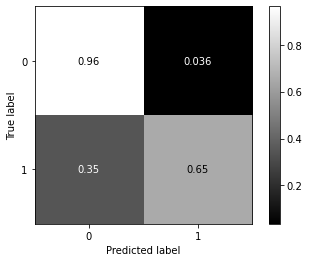

In [ ]:
print("---------------------------Logistic Regression ------------------------------------")
model = LogisticRegression(solver='liblinear', random_state=15).fit(x_train, y_train)
import joblib
tahminlerimiz2 = model.predict(x_test)
guven = model.predict_proba(x_test)
print(guven)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insanmi/lgreg.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### svm

In [ ]:
svms = ["Duygu","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","24","25","26","28","29","30","31","32","34","36","37","38","39","40","41","42","43","44","45","46","47","50","51","52","53","54","56","57","58","60","61","62","63","64","66","69","70","71","72","73","74","75","78","79","80","82","83","84","85","86","88","89","90","91","94","95","96","100","102","103","104","105","106","107","108","111","112","113","114","115","116","118","119","120","121","124","125","126"]

In [ ]:
dataFrame = dataFrame.loc[:,svms]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

--------------------------- Linear SVC ------------------------------------
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       193
           5       0.87      0.77      0.82        78

    accuracy                           0.90       271
   macro avg       0.89      0.86      0.87       271
weighted avg       0.90      0.90      0.90       271

Confusion Matrix
[[184   9]
 [ 18  60]]
Accuracy Score
0.9003690036900369
Validation Score Mean
0.8816835016835016
Validation Sonuçları
[0.94545455 0.87037037 0.87037037 0.85185185 0.87037037]


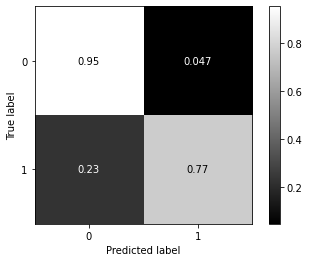

In [ ]:
print("--------------------------- Linear SVC ------------------------------------")

model= svm.SVC(kernel='linear',probability=True,gamma='auto').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)

print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insanmi/svmlineer.pkl')


scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

### İnsan Sesi Türü ?

In [ ]:
dataFrame = pd.read_csv('/content/drive/MyDrive/csvler/librosasonmfcc127/insansinifi.csv')
dataFrame = dataFrame.drop("Unnamed: 0", axis=1)
dataFrame = dataFrame.drop("Unnamed: 0.1", axis=1)
dataFrame= dataFrame.replace(to_replace ="human2",value =1)
#dataFrame= dataFrame.replace(to_replace ="human",value =1)
dataFrame= dataFrame.replace(to_replace ="oksurme",value =2)
dataFrame= dataFrame.replace(to_replace ="nefes",value =3)
dataFrame= dataFrame.replace(to_replace ="ciglik",value =4)


##### KNN

In [ ]:
knn = ["Duygu","1","2","3","5","8","9","10","11","13","14","22","31","63","69","72","81","90","91","101","109","112"]

In [ ]:
dataFrame = dataFrame.loc[:,knn]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

--------------------------- KNN n=3 ------------------------------------
              precision    recall  f1-score   support

           1       0.92      0.90      0.91        62
           2       0.66      0.98      0.79        55
           3       0.90      0.53      0.67        36
           4       0.92      0.63      0.75        35

    accuracy                           0.80       188
   macro avg       0.85      0.76      0.78       188
weighted avg       0.84      0.80      0.80       188

Confusion Matrix
[[56  4  0  2]
 [ 1 54  0  0]
 [ 2 15 19  0]
 [ 2  9  2 22]]
Accuracy Score
0.8031914893617021
Validation Score Mean
0.7238975817923187
Validation Sonuçları
[0.68421053 0.71052632 0.68421053 0.81081081 0.72972973]


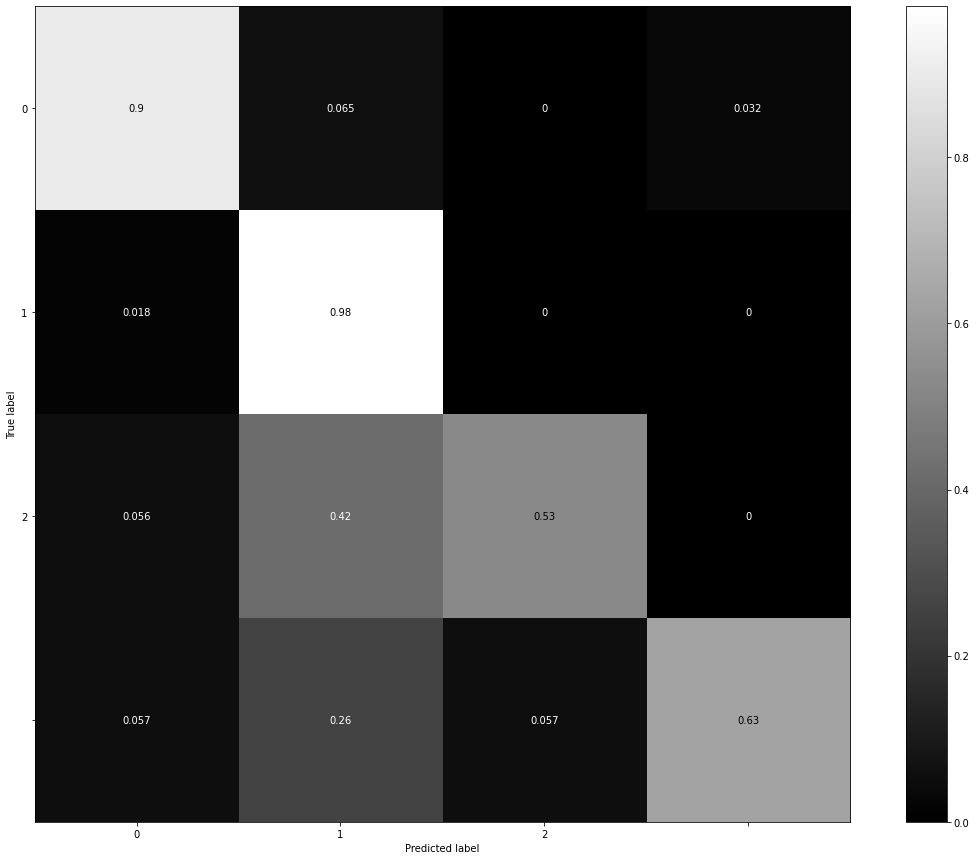

In [ ]:
print("--------------------------- KNN n=3 ------------------------------------")

model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insan/knn.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')


##### svm

In [ ]:
svms = ['Duygu','0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '50', '51', '53', '54', '56', '58', '59', '60', '62', '63', '65', '67', '69', '73', '74', '76', '81', '84', '85', '86', '89', '92', '93', '98', '101', '102', '106', '108', '110', '111', '114', '116', '118', '120', '122', '124', '127']

In [ ]:
dataFrame = dataFrame.loc[:,svms]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

--------------------------- Linear SVC ------------------------------------
              precision    recall  f1-score   support

           1       0.96      0.89      0.92        62
           2       0.84      0.89      0.87        55
           3       0.86      0.86      0.86        36
           4       0.92      0.97      0.94        35

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188

Confusion Matrix
[[55  3  1  3]
 [ 2 49  4  0]
 [ 0  5 31  0]
 [ 0  1  0 34]]
Accuracy Score
0.898936170212766
Validation Score Mean
0.835135135135135
Validation Sonuçları
[0.78947368 0.86842105 0.84210526 0.91891892 0.75675676]


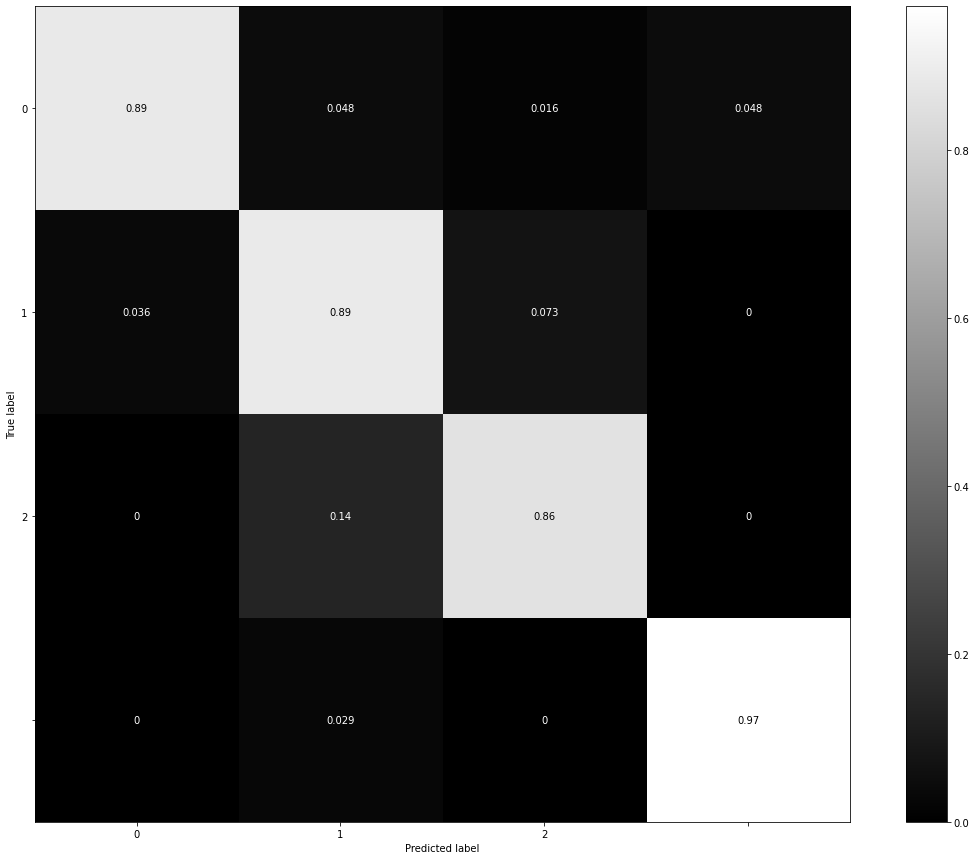

In [ ]:
print("--------------------------- Linear SVC ------------------------------------")

model= svm.SVC(kernel='linear',probability=True,gamma='auto').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)

print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insan/svmlineer.pkl')


scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### Gauss Bayes

In [ ]:
gauss = ['Duygu','0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '18', '19', '20', '23', '25', '26', '27', '28', '31', '36', '37', '38', '39', '41', '43', '44', '45', '46', '48', '55', '56', '59', '61', '64', '66', '67', '75', '84', '109', '118', '120']

In [ ]:
dataFrame = dataFrame.loc[:,gauss]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------GaussianNB ------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.82      0.87        62
           2       0.72      0.76      0.74        55
           3       0.60      0.67      0.63        36
           4       0.86      0.86      0.86        35

    accuracy                           0.78       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.79      0.78      0.79       188

Confusion Matrix
[[51  5  1  5]
 [ 1 42 12  0]
 [ 2 10 24  0]
 [ 1  1  3 30]]
Accuracy Score
0.7819148936170213
Validation Score Mean
0.7923186344238975
Validation Sonuçları
[0.78947368 0.89473684 0.73684211 0.89189189 0.64864865]


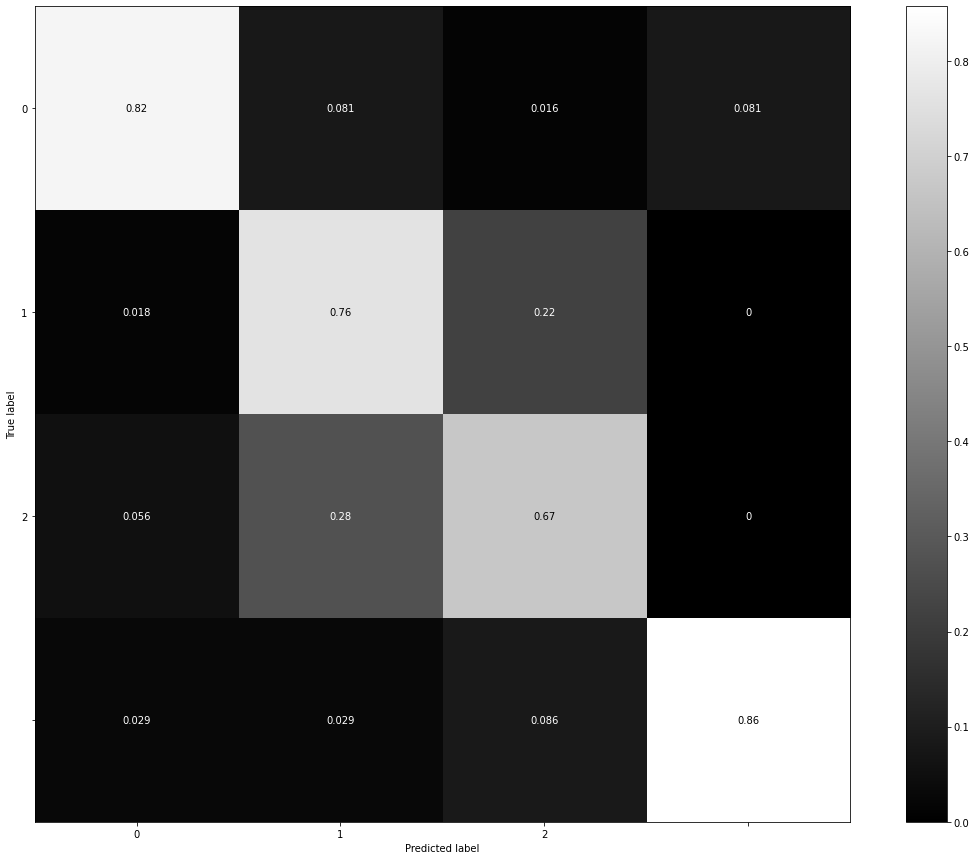

In [ ]:
print("---------------------------GaussianNB ------------------------------------")

model = GaussianNB().fit(x_train, y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insan/gauss.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### Log Reg

In [ ]:
lgreg = ['Duygu','0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '15', '16', '17', '19', '21', '22', '23', '25', '27', '28', '29', '32', '33', '35', '41', '44', '46', '51', '53', '55', '56', '57', '61', '62', '63', '65', '69', '76', '81', '84', '85', '86', '93', '107', '108', '109', '111', '116', '118', '122']

In [ ]:
dataFrame = dataFrame.loc[:,lgreg]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------Logistic Regression ------------------------------------
[[2.67611823e-02 5.32095713e-01 3.27726333e-01 1.13416771e-01]
 [6.31341980e-01 2.54285810e-01 8.15225826e-02 3.28496274e-02]
 [1.22619946e-01 1.21914113e-02 1.94198653e-02 8.45768777e-01]
 [6.48618527e-02 1.58968703e-02 9.41165782e-03 9.09829619e-01]
 [1.10463457e-02 8.41539589e-02 8.88540294e-01 1.62594018e-02]
 [7.09750344e-01 2.70609983e-01 7.11522314e-03 1.25244493e-02]
 [1.54517213e-01 3.41532675e-01 4.28865653e-01 7.50844593e-02]
 [4.28016375e-02 4.58362602e-01 4.31153266e-01 6.76824951e-02]
 [2.40982707e-01 2.39641551e-01 4.73984146e-01 4.53915964e-02]
 [5.23270125e-02 1.30564260e-01 7.37500483e-01 7.96082444e-02]
 [4.23182483e-02 1.80802670e-01 7.47451979e-01 2.94271032e-02]
 [4.55896992e-03 9.21706168e-03 9.07752433e-01 7.84715355e-02]
 [1.23764114e-02 1.50707857e-01 6.77461775e-02 7.69169554e-01]
 [8.32618868e-01 1.25129349e-01 1.47413573e-02 2.75104255e-02]
 [4.21942469e-01 3.22799620e-01 2.

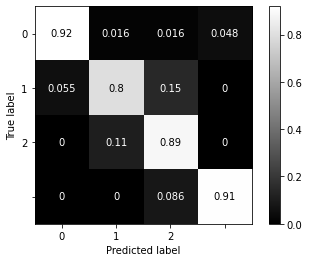

In [ ]:
print("---------------------------Logistic Regression ------------------------------------")
model = LogisticRegression(solver='liblinear', random_state=15).fit(x_train, y_train)
import joblib
tahminlerimiz2 = model.predict(x_test)
guven = model.predict_proba(x_test)
print(guven)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/insan/lgreg.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

### Hayvan Sesi Türü?

In [ ]:
dataFrame = pd.read_csv('/content/drive/MyDrive/csvler/librosasonmfcc127/hayvansinifi.csv')
dataFrame = dataFrame.drop("Unnamed: 0", axis=1)
dataFrame = dataFrame.drop("Unnamed: 0.1", axis=1)
dataFrame= dataFrame.replace(to_replace ="dogs",value =1)
dataFrame= dataFrame.replace(to_replace ="cats",value =2)

##### Log Reg

In [ ]:
lgreg = ['Duygu','0', '1', '2', '3', '4', '6', '8', '9', '10', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '54', '55', '57', '58', '63', '70', '79', '86', '89', '93', '105', '110', '114', '115']

In [ ]:
dataFrame = dataFrame.loc[:,lgreg]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------Logistic Regression ------------------------------------
[[0.9798438  0.0201562 ]
 [0.30608788 0.69391212]
 [0.18755166 0.81244834]
 [0.81431629 0.18568371]
 [0.16908104 0.83091896]
 [0.02303069 0.97696931]
 [0.18028719 0.81971281]
 [0.11727226 0.88272774]
 [0.66153929 0.33846071]
 [0.23550849 0.76449151]
 [0.13659838 0.86340162]
 [0.93158614 0.06841386]
 [0.32024205 0.67975795]
 [0.42111405 0.57888595]
 [0.42859879 0.57140121]
 [0.38991386 0.61008614]
 [0.1010284  0.8989716 ]
 [0.12337668 0.87662332]
 [0.11116112 0.88883888]
 [0.27580528 0.72419472]
 [0.24471028 0.75528972]
 [0.03715183 0.96284817]
 [0.57358937 0.42641063]
 [0.18166654 0.81833346]
 [0.18638124 0.81361876]
 [0.31501115 0.68498885]
 [0.13821504 0.86178496]
 [0.61762684 0.38237316]
 [0.15080042 0.84919958]
 [0.97678245 0.02321755]
 [0.97530374 0.02469626]
 [0.0456514  0.9543486 ]
 [0.21276798 0.78723202]
 [0.21040826 0.78959174]
 [0.97449725 0.02550275]
 [0.61987726 0.38012274]
 [0.10640676 0.8

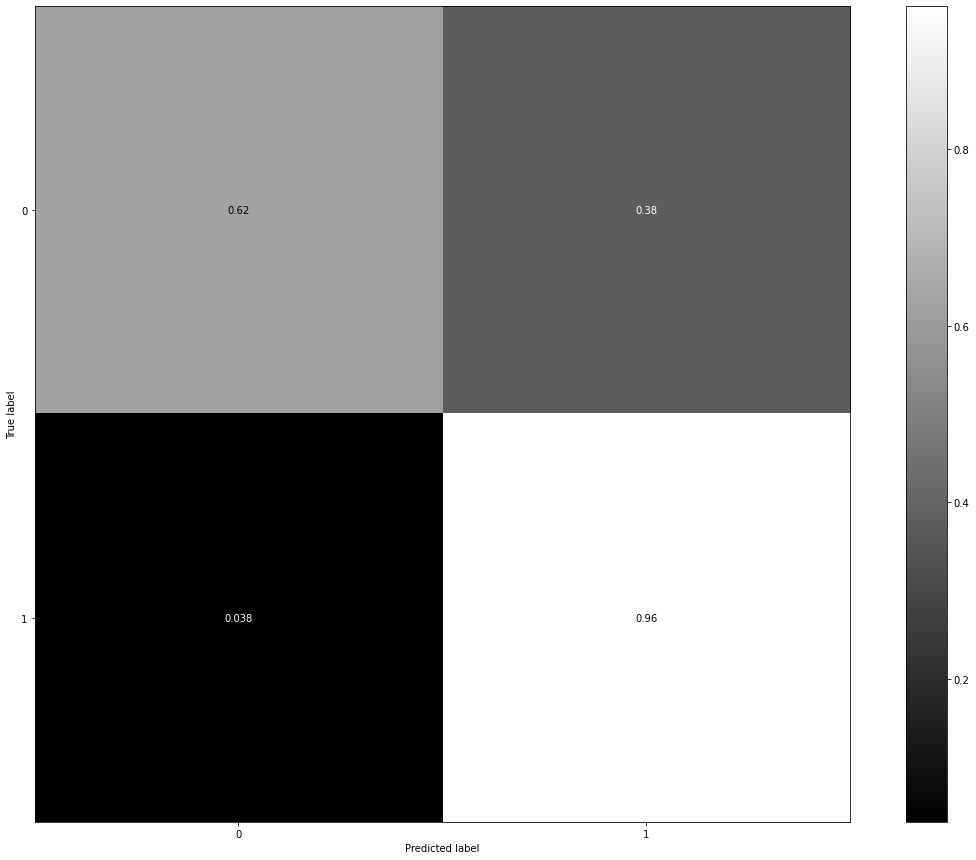

In [ ]:
print("---------------------------Logistic Regression ------------------------------------")
model = LogisticRegression(solver='liblinear', random_state=15).fit(x_train, y_train)
import joblib
tahminlerimiz2 = model.predict(x_test)
guven = model.predict_proba(x_test)
print(guven)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/lgreg.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### Gauss Bayes

In [ ]:
gauss = ["Duygu",'2', '3', '4', '6', '7', '10', '13', '30', '45', '56']

In [ ]:
dataFrame = dataFrame.loc[:,gauss]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---------------------------GaussianNB ------------------------------------
              precision    recall  f1-score   support

           1       0.88      0.66      0.75        32
           2       0.82      0.94      0.87        52

    accuracy                           0.83        84
   macro avg       0.85      0.80      0.81        84
weighted avg       0.84      0.83      0.83        84

Confusion Matrix
[[21 11]
 [ 3 49]]
Accuracy Score
0.8333333333333334
Validation Score Mean
0.8095588235294118
Validation Sonuçları
[0.82352941 0.88235294 0.82352941 0.70588235 0.8125    ]


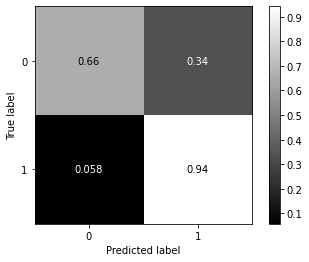

In [ ]:
print("---------------------------GaussianNB ------------------------------------")

model = GaussianNB().fit(x_train, y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/gauss.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##### KNN

In [ ]:
knn = ["Duygu",'1', '2', '3', '5', '8', '9', '10', '11', '13', '14', '22', '31', '63', '69', '72', '81', '90', '91', '101', '109', '112']

In [ ]:
dataFrame = dataFrame.loc[:,knn]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

--------------------------- KNN n=3 ------------------------------------
              precision    recall  f1-score   support

           1       0.96      0.69      0.80        32
           2       0.84      0.98      0.90        52

    accuracy                           0.87        84
   macro avg       0.90      0.83      0.85        84
weighted avg       0.88      0.87      0.86        84

Confusion Matrix
[[22 10]
 [ 1 51]]
Accuracy Score
0.8690476190476191
Validation Score Mean
0.7977941176470588
Validation Sonuçları
[0.76470588 0.76470588 0.88235294 0.76470588 0.8125    ]


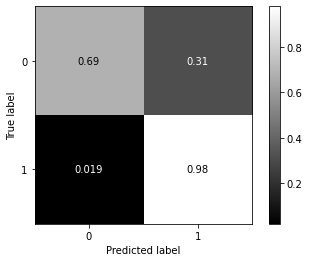

In [ ]:
print("--------------------------- KNN n=3 ------------------------------------")

model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/knn.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')


##### svm

In [ ]:
svms = ["Duygu",'2', '3', '4', '6', '7', '10', '13', '30', '45', '56']

In [ ]:
dataFrame = dataFrame.loc[:,svms]

In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

--------------------------- Linear SVC ------------------------------------
              precision    recall  f1-score   support

           1       0.92      0.69      0.79        32
           2       0.83      0.96      0.89        52

    accuracy                           0.86        84
   macro avg       0.88      0.82      0.84        84
weighted avg       0.87      0.86      0.85        84

Confusion Matrix
[[22 10]
 [ 2 50]]
Accuracy Score
0.8571428571428571
Validation Score Mean
0.8683823529411765
Validation Sonuçları
[0.82352941 1.         0.94117647 0.76470588 0.8125    ]


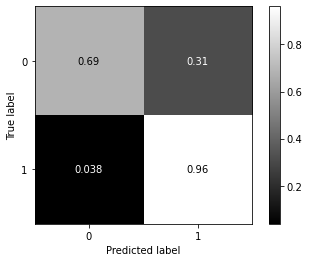

In [ ]:
print("--------------------------- Linear SVC ------------------------------------")

model= svm.SVC(kernel='linear',probability=True,gamma='auto').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)

print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/svmlineer.pkl')


scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

##ROC AUC

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


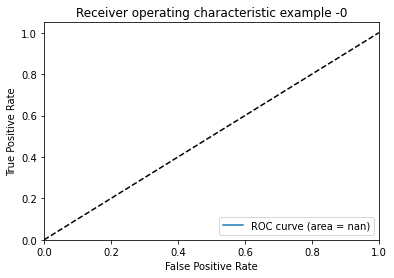

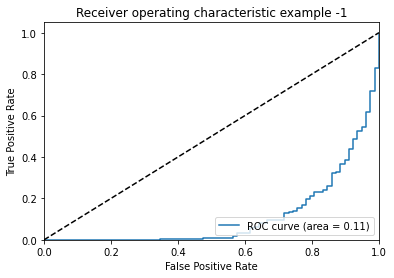

ValueError: ignored

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 2
# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[0,1,2])
y_test = label_binarize(y_test, classes=[0,1,2])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  print(i)
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

#SFSBFS

##Split ve Random State


In [ ]:
y = dataFrame["Duygu"].values
X = dataFrame.drop("Duygu",axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##modeller

### KNN


In [ ]:
print("--------------------------- KNN n=3 ------------------------------------")

model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/knn.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')


In [ ]:
from sklearn.svm import LinearSVC
n_classes = 1

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[0,1])
y_test = label_binarize(y_test, classes=[0,1])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

#### SFS BFS (Bunlar çok sağlam öznitelik seçimleri ama saçmalayabiliyorlar ya da makineyi saçmalatabiliyorlar)

In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sfs1 = SFS(model, forward=False, verbose=2, scoring='accuracy', cv=0, n_jobs=-1, k_features=1).fit(x_train,y_train)
print(sfs1)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("knn2.xlsx")



In [ ]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("sfs.xlsx")


In [ ]:
from sklearn.externals import joblib 
joblib.dump(sfs1, f'/content/drive/MyDrive/sfs100.pkl')


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [ ]:
fig1.set_size_inches(30, 30)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if v > 0.01:
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(i)

# plot feature importance
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.rcParams["figure.figsize"] = (30,25)
pyplot.show()

### DecisionTreeClassifier


---------------------------DecisionTreeClassifier ------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.89      0.88       193
           5       0.71      0.67      0.69        78

    accuracy                           0.83       271
   macro avg       0.79      0.78      0.78       271
weighted avg       0.82      0.83      0.82       271

Confusion Matrix
[[172  21]
 [ 26  52]]
Accuracy Score
0.8265682656826568
Validation Score Mean
0.7749494949494949
Validation Sonuçları
[0.76363636 0.75925926 0.72222222 0.81481481 0.81481481]


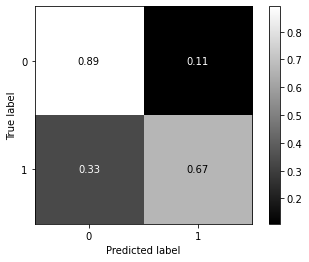

In [ ]:
print("---------------------------DecisionTreeClassifier ------------------------------------")

model = DecisionTreeClassifier().fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/model_decisiontree.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 3

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[0,1,2])
y_test = label_binarize(y_test, classes=[0,1,2])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

### GaussianNB


---------------------------GaussianNB ------------------------------------
              precision    recall  f1-score   support

           1       0.71      0.47      0.57        32
           2       0.73      0.88      0.80        52

    accuracy                           0.73        84
   macro avg       0.72      0.68      0.68        84
weighted avg       0.72      0.73      0.71        84

Confusion Matrix
[[15 17]
 [ 6 46]]
Accuracy Score
0.7261904761904762
Validation Score Mean
0.7147058823529412
Validation Sonuçları
[0.64705882 0.70588235 0.70588235 0.76470588 0.75      ]


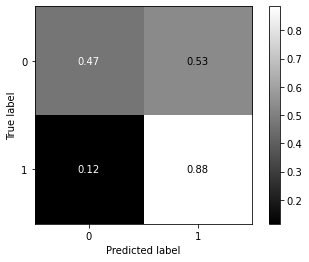

In [ ]:
print("---------------------------GaussianNB ------------------------------------")

model = GaussianNB().fit(x_train, y_train)

tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/gauss.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 3

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[0,1,2])
y_test = label_binarize(y_test, classes=[0,1,2])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

#### SFS BFS (Bunlar çok sağlam öznitelik seçimleri ama saçmalayabiliyorlar ya da makineyi saçmalatabiliyorlar)

In [ ]:
dataFrame.shape

(902, 129)

In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sfs1 = SFS(model, forward=False, verbose=2, scoring='accuracy', cv=0, n_jobs=-1, k_features=1).fit(x_train,y_train)
print(sfs1)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("gauss2.xlsx")



In [ ]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("sfs.xlsx")


In [ ]:
from sklearn.externals import joblib 
joblib.dump(sfs1, f'/content/drive/MyDrive/sfs100.pkl')


In [ ]:
sfs1.k_feature_idx_[40]

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [ ]:
fig1.set_size_inches(30, 30)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if v > 0.01:
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(i)

# plot feature importance
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.rcParams["figure.figsize"] = (30,25)
pyplot.show()

In [ ]:
dataFrame

### Logistic Regression


---------------------------Logistic Regression ------------------------------------
[[0.9798438  0.0201562 ]
 [0.30608788 0.69391212]
 [0.18755166 0.81244834]
 [0.81431629 0.18568371]
 [0.16908104 0.83091896]
 [0.02303069 0.97696931]
 [0.18028719 0.81971281]
 [0.11727226 0.88272774]
 [0.66153929 0.33846071]
 [0.23550849 0.76449151]
 [0.13659838 0.86340162]
 [0.93158614 0.06841386]
 [0.32024205 0.67975795]
 [0.42111405 0.57888595]
 [0.42859879 0.57140121]
 [0.38991386 0.61008614]
 [0.1010284  0.8989716 ]
 [0.12337668 0.87662332]
 [0.11116112 0.88883888]
 [0.27580528 0.72419472]
 [0.24471028 0.75528972]
 [0.03715183 0.96284817]
 [0.57358937 0.42641063]
 [0.18166654 0.81833346]
 [0.18638124 0.81361876]
 [0.31501115 0.68498885]
 [0.13821504 0.86178496]
 [0.61762684 0.38237316]
 [0.15080042 0.84919958]
 [0.97678245 0.02321755]
 [0.97530374 0.02469626]
 [0.0456514  0.9543486 ]
 [0.21276798 0.78723202]
 [0.21040826 0.78959174]
 [0.97449725 0.02550275]
 [0.61987726 0.38012274]
 [0.10640676 0.8

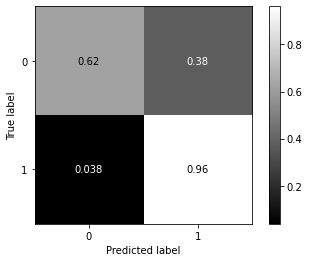

In [ ]:
print("---------------------------Logistic Regression ------------------------------------")
model = LogisticRegression(solver='liblinear', random_state=15).fit(x_train, y_train)
import joblib
tahminlerimiz2 = model.predict(x_test)
guven = model.predict_proba(x_test)
print(guven)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/lgreg.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

In [ ]:
y_train

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


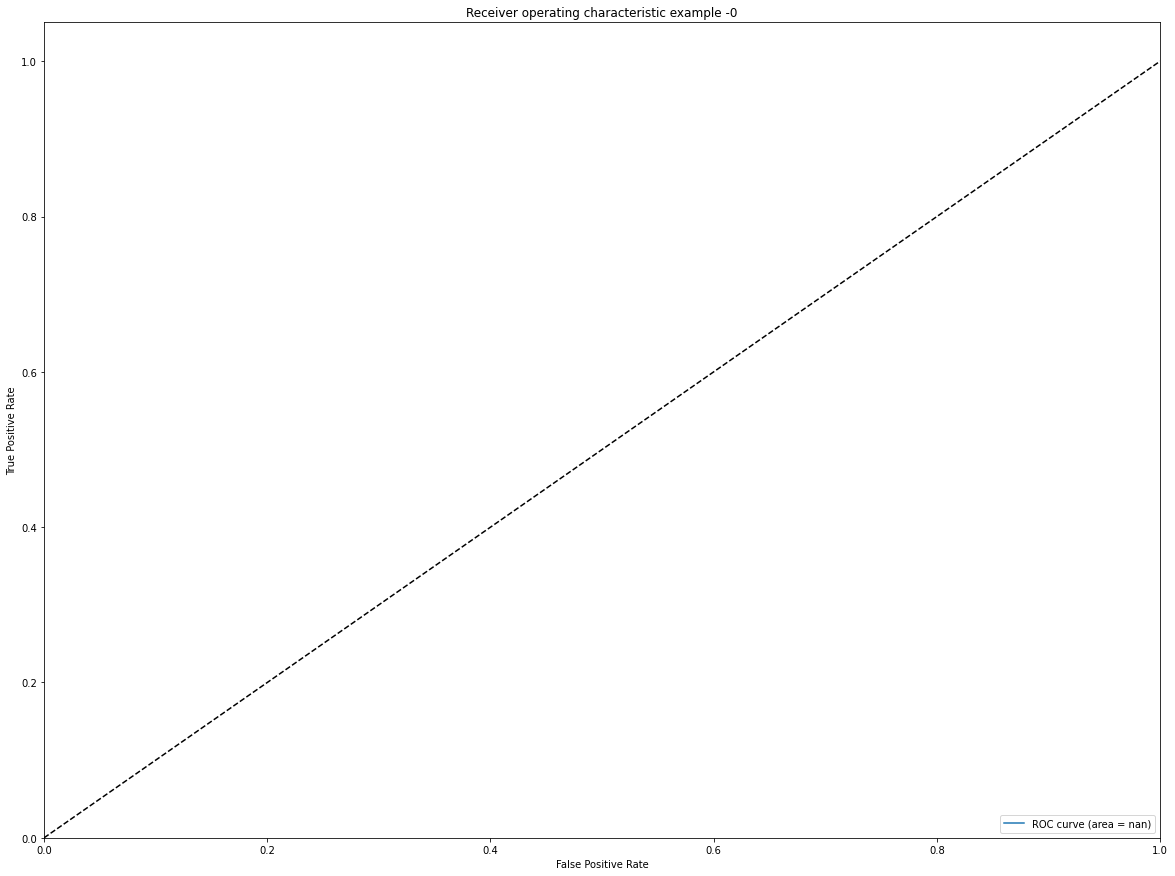

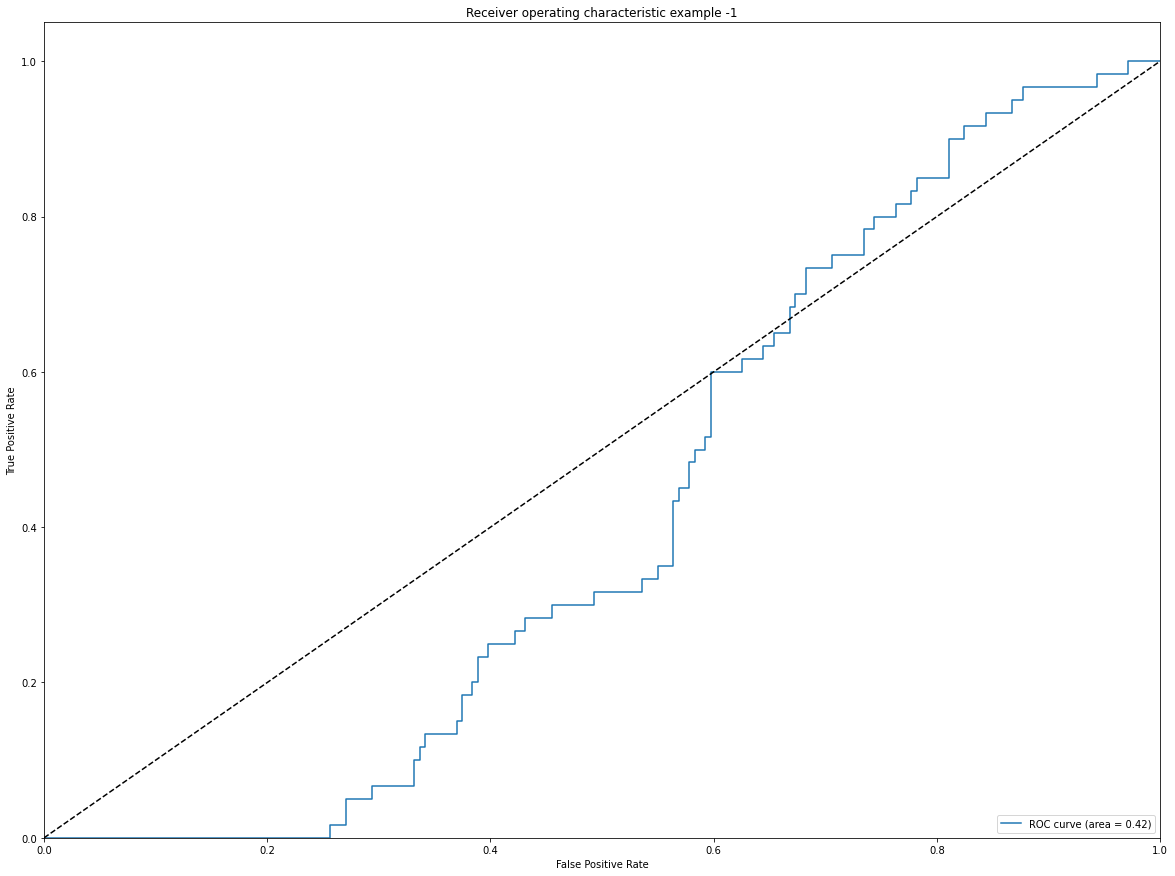

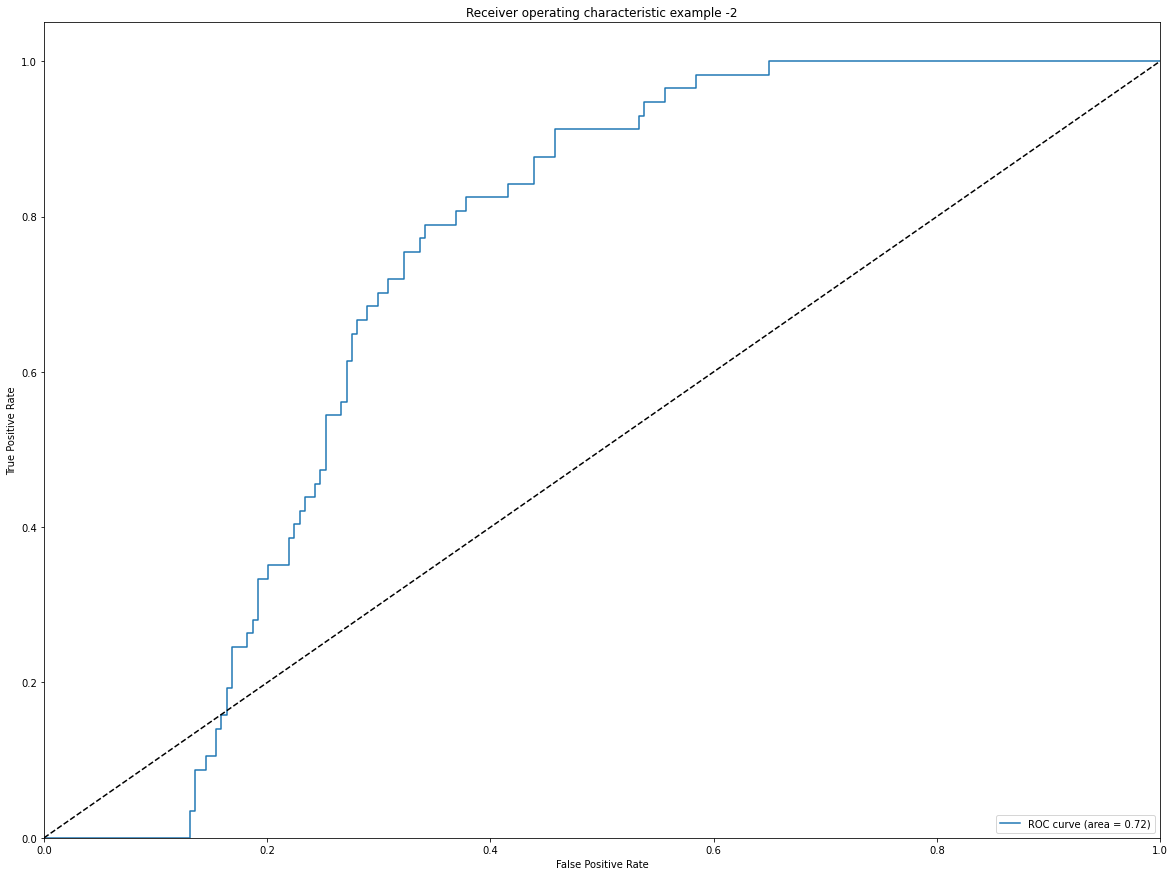

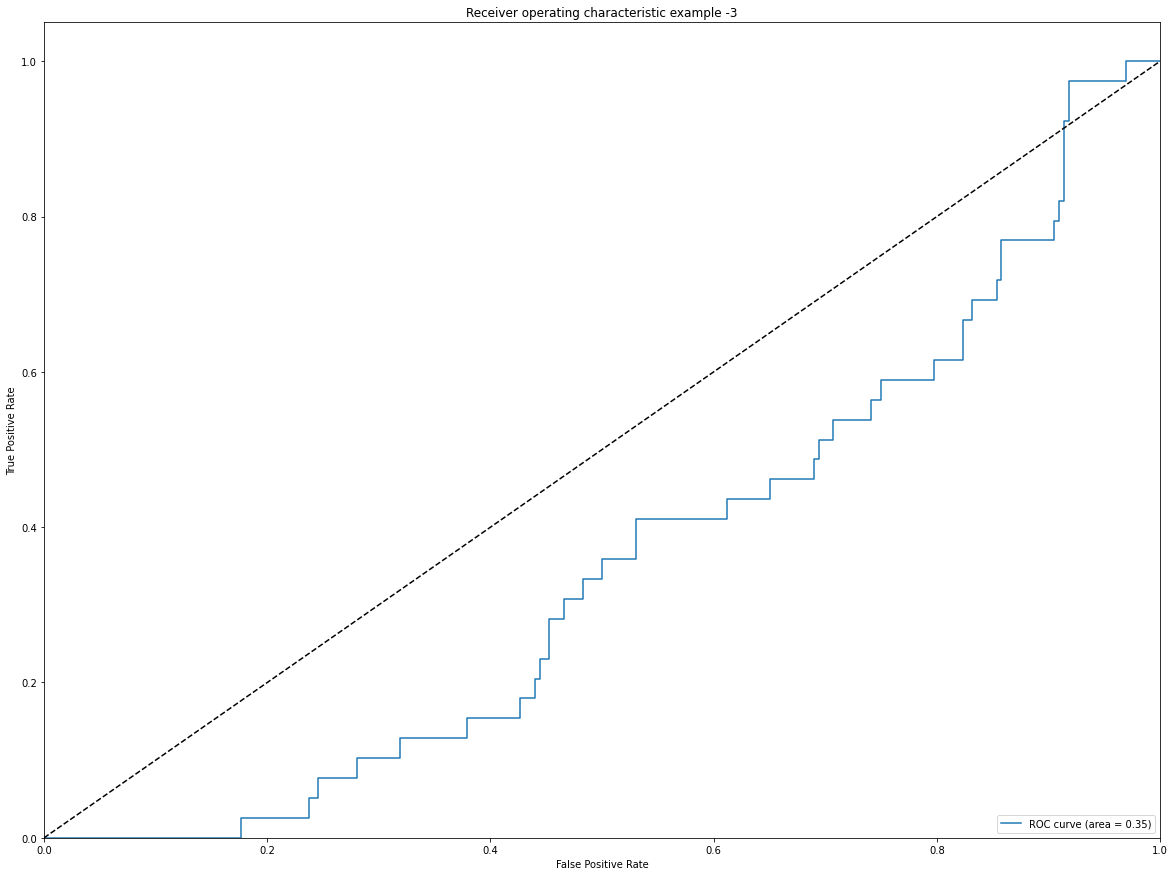

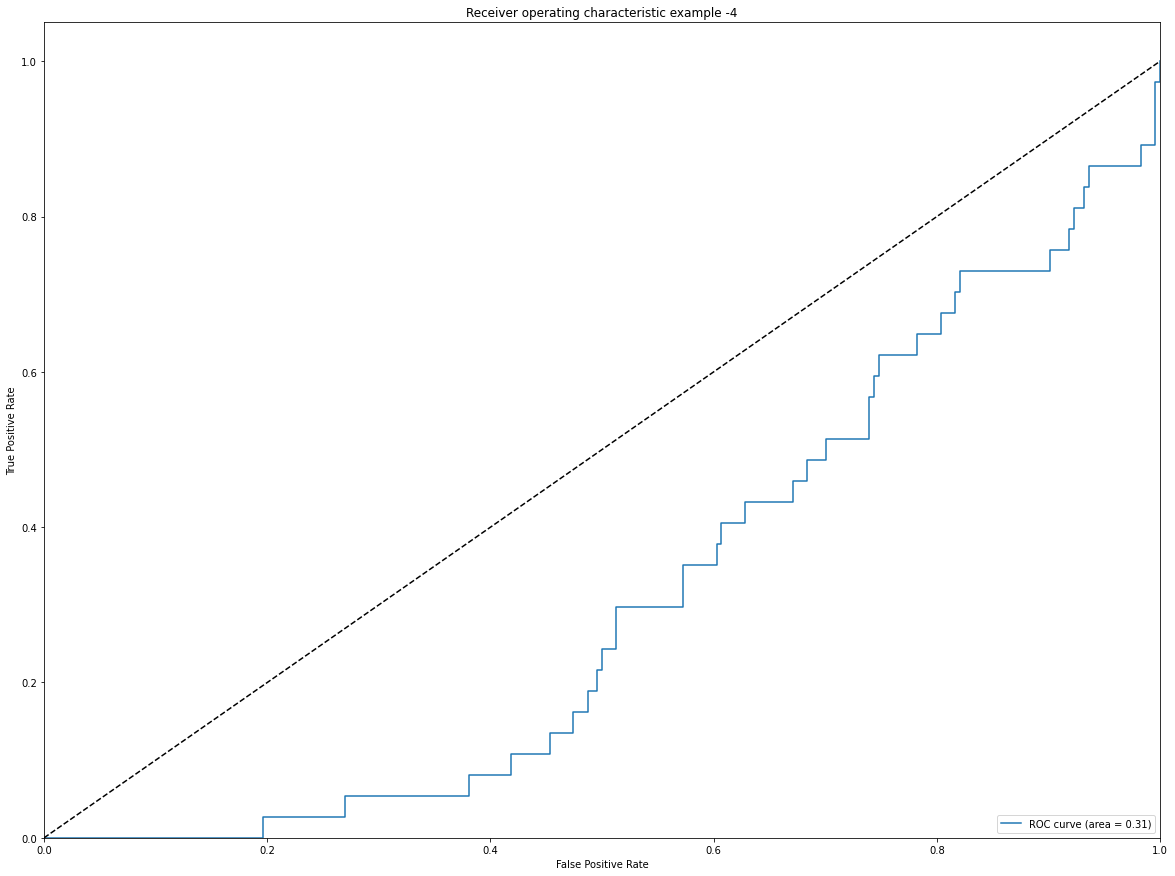

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


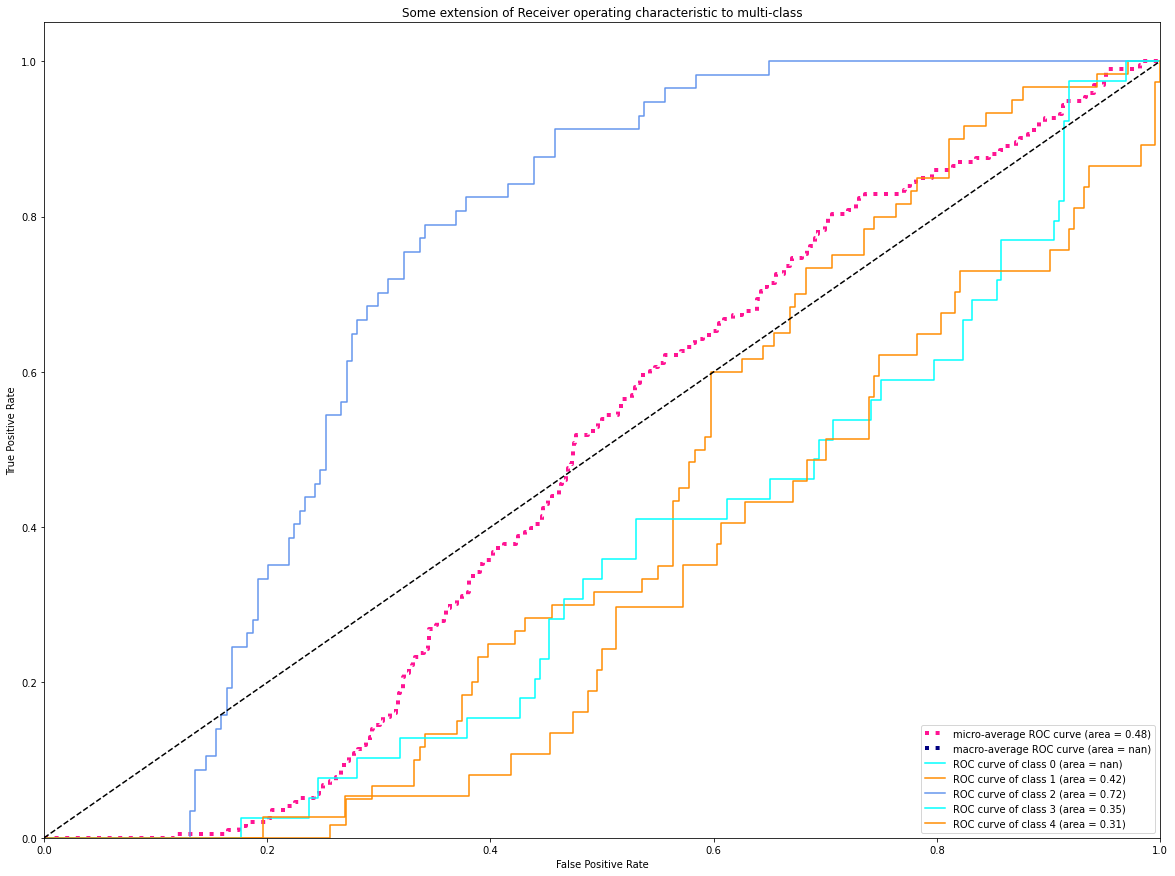

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 5

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[1,2,3,4,5])
y_test = label_binarize(y_test, classes=[1,2,3,4,5])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

#### SFS BFS (Bunlar çok sağlam öznitelik seçimleri ama saçmalayabiliyorlar ya da makineyi saçmalatabiliyorlar)

In [ ]:
dataFrame.shape

(902, 129)

In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    1.5s finished

[2021-10-07 22:51:08] Features: 127/1 -- score: 0.927461139896373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    0.5s finished

[2021-10-07 22:51:08] Features: 126/1 -- score: 0.9326424870466321[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    0.5s finished

[2021-10-07 22:51:09] Features: 125/1 -- score: 0.9326424870466321[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.5s finished

[2021-10-07 22:51:09] Features: 124/1 -- score: 0.9326424870466321[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parall

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=15,
                                                       solver='liblinear',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
64,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",[0.9430051813471503],0.943005,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",NaN,0,NaN
49,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",[0.9430051813471503],0.943005,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",NaN,0,NaN
51,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",[0.9430051813471503],0.943005,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",NaN,0,NaN
53,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",[0.9430051813471503],0.943005,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",NaN,0,NaN
54,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",[0.9430051813471503],0.943005,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...",NaN,0,NaN


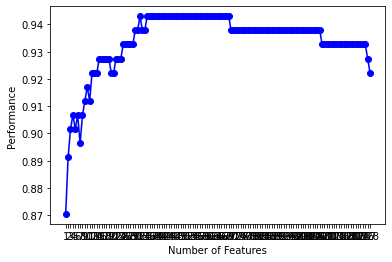

In [ ]:
sfs1 = SFS(model, forward=False, verbose=2, scoring='accuracy', cv=0, n_jobs=-1, k_features=1).fit(x_train,y_train)
print(sfs1)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("lreg2.xlsx")



In [ ]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("sfs.xlsx")


In [ ]:
from sklearn.externals import joblib 
joblib.dump(sfs1, f'/content/drive/MyDrive/sfs100.pkl')


In [ ]:
sfs1.k_feature_idx_[40]

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [ ]:
fig1.set_size_inches(30, 30)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if v > 0.01:
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(i)

# plot feature importance
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.rcParams["figure.figsize"] = (30,25)
pyplot.show()

In [ ]:
dataFrame

### Linear SVC


--------------------------- Linear SVC ------------------------------------
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       193
           5       0.88      0.76      0.81        78

    accuracy                           0.90       271
   macro avg       0.89      0.86      0.87       271
weighted avg       0.90      0.90      0.90       271

Confusion Matrix
[[185   8]
 [ 19  59]]
Accuracy Score
0.9003690036900369
Validation Score Mean
0.8595959595959595
Validation Sonuçları
[0.90909091 0.85185185 0.87037037 0.7962963  0.87037037]


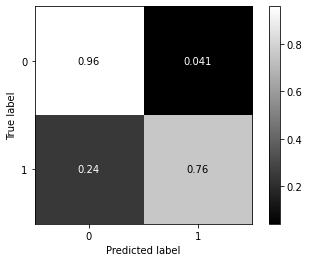

In [ ]:
print("--------------------------- Linear SVC ------------------------------------")

model= svm.SVC(kernel='linear',probability=True,gamma='auto').fit(x_train,y_train)

tahminlerimiz2 = model.predict(x_test)

print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/pkl/hayvan/svmlineer.pkl')


scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 2

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[1,2])
y_test = label_binarize(y_test, classes=[1,2])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

#### SFS BFS (Bunlar çok sağlam öznitelik seçimleri ama saçmalayabiliyorlar ya da makineyi saçmalatabiliyorlar)

In [ ]:
dataFrame.shape

(902, 129)

In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sfs1 = SFS(model, forward=False, verbose=2, scoring='accuracy', cv=0, n_jobs=-1, k_features=1).fit(x_train,y_train)
print(sfs1)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("svvm2.xlsx")



In [ ]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
result_LR = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T
result_LR.sort_values('avg_score', ascending=0, inplace=True)
result_LR.head()

In [ ]:
result_LR.to_excel("sfs.xlsx")


In [ ]:
from sklearn.externals import joblib 
joblib.dump(sfs1, f'/content/drive/MyDrive/sfs100.pkl')


In [ ]:
sfs1.k_feature_idx_[40]

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [ ]:
fig1.set_size_inches(30, 30)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if v > 0.01:
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(i)

# plot feature importance
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.rcParams["figure.figsize"] = (30,25)
pyplot.show()

In [ ]:
dataFrame

### Decision Tree Regressor


---------------------------DecisionTreeRegressor ------------------------------------
              precision    recall  f1-score   support

           1       0.68      0.78      0.73        60
           2       0.51      0.53      0.52        57
           3       0.42      0.46      0.44        39
           4       0.65      0.46      0.54        37
           5       0.66      0.63      0.64        78

    accuracy                           0.59       271
   macro avg       0.58      0.57      0.57       271
weighted avg       0.60      0.59      0.59       271

Confusion Matrix
[[47  1  3  2  7]
 [ 5 30 13  2  7]
 [ 1 14 18  1  5]
 [ 4  6  4 17  6]
 [12  8  5  4 49]]
Accuracy Score
0.5940959409594095
Validation Score Mean
0.28541694005266754
Validation Sonuçları
[0.3866741  0.63409125 0.16666667 0.13165829 0.10799439]


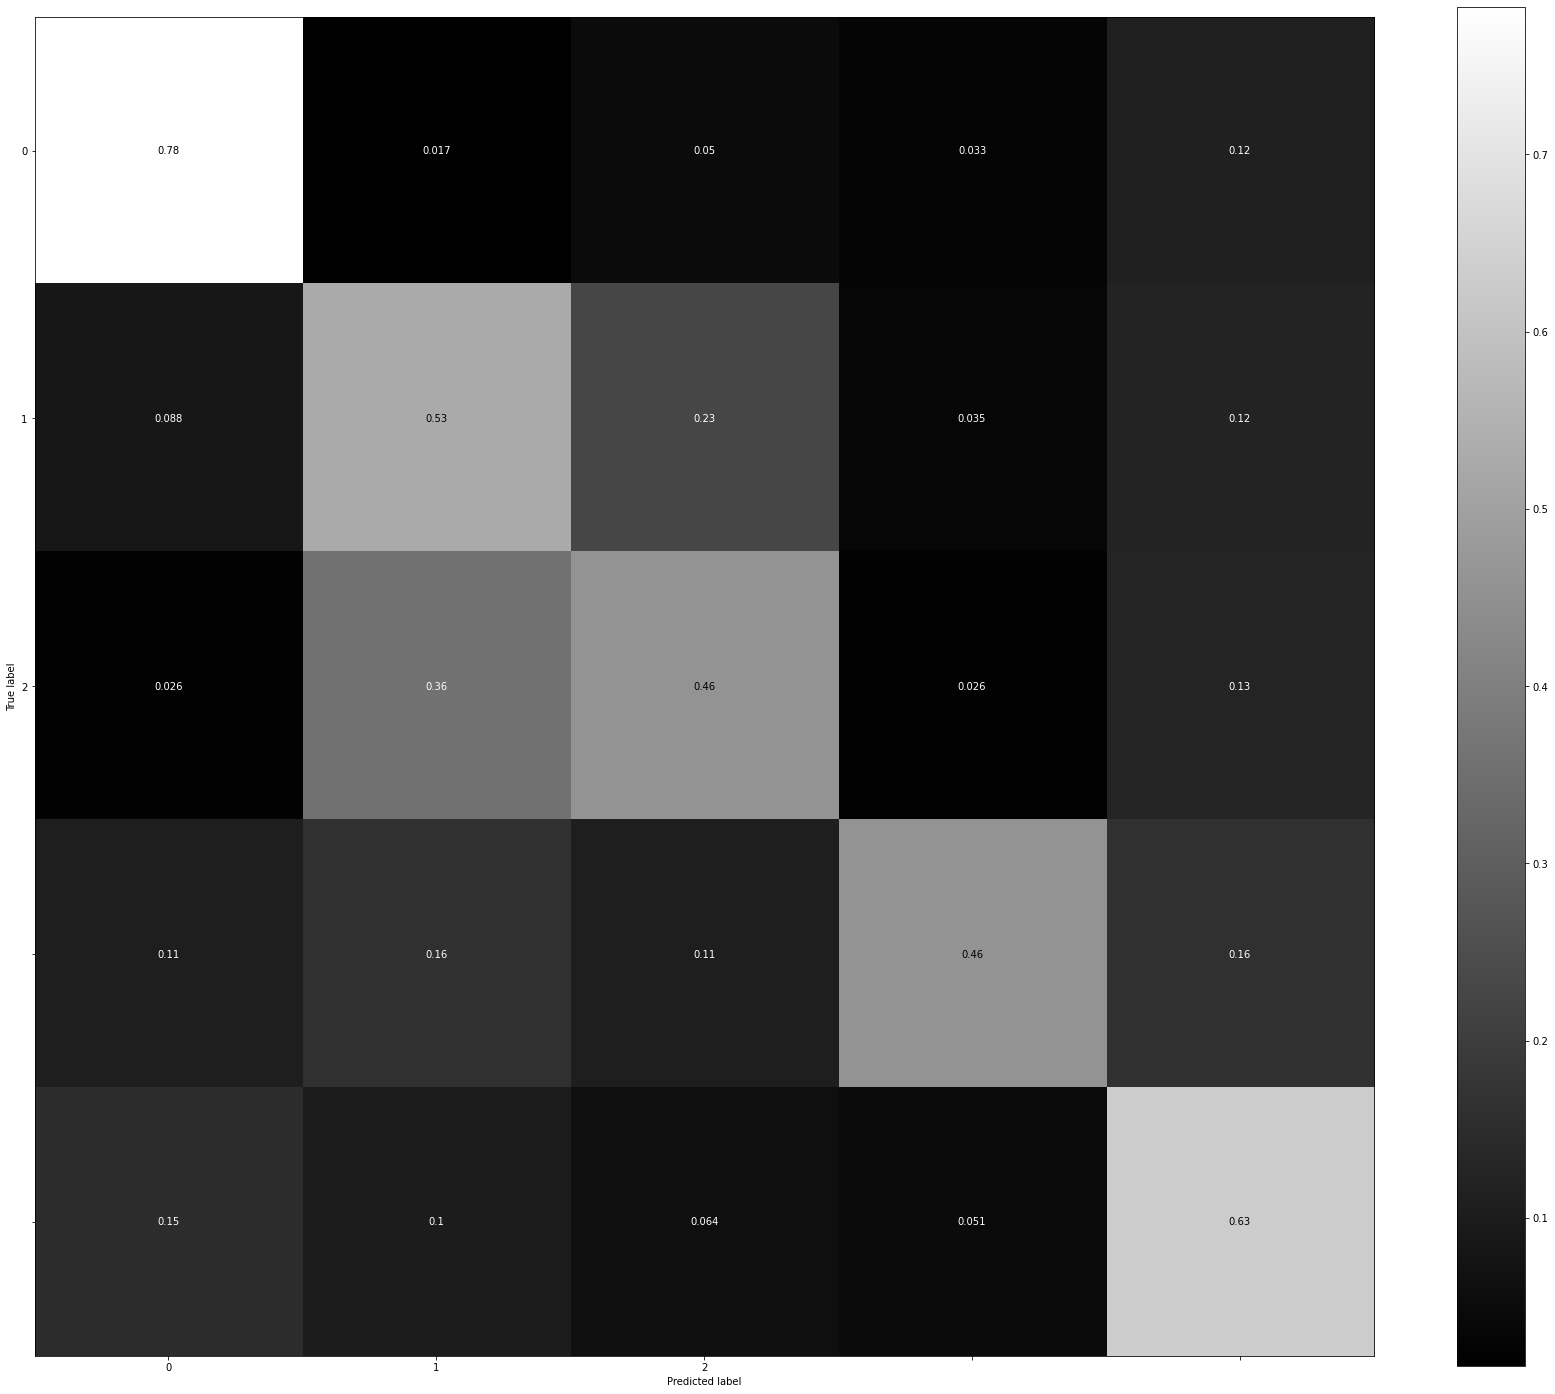

In [ ]:
print("---------------------------DecisionTreeRegressor ------------------------------------")

model = DecisionTreeRegressor().fit(x_train,y_train)
tahminlerimiz2 = model.predict(x_test)
print(classification_report(y_test,tahminlerimiz2))
print("Confusion Matrix")
print(confusion_matrix(y_test,tahminlerimiz2))
print("Accuracy Score")
print(accuracy_score(y_test,tahminlerimiz2))
#joblib.dump(model, f'/content/drive/MyDrive/model_decisionregress.pkl')
scores = cross_val_score(model, x_test, y_test)
print("Validation Score Mean")
print(scores.mean())
print("Validation Sonuçları")
print(scores)
cm = confusion_matrix(y_test, tahminlerimiz2,  normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]).plot(cmap='gray')

In [ ]:
from sklearn.svm import LinearSVC
n_classes = 3

# shuffle and split training and test sets
# classifier
y_train = label_binarize(y_train, classes=[0,1,2])
y_test = label_binarize(y_test, classes=[0,1,2])
#clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train)
tahminlerimiz2 = model.predict(x_test)
#lineer için y score
  #y_score = model.decision_function(x_test)
#knn için y score
y_score = model.predict_proba(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'Receiver operating characteristic example -{i}')
    plt.legend(loc="lower right")
    
    plt.show()


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves bu değil
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()
# plt.savefig('rocauclineer.png')

####dec tree feature importante


In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor().fit(x_train,y_train)
# fit the model
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if v > 0.01:
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(i)

# plot feature importance
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.rcParams["figure.figsize"] = (30,25)
pyplot.show()

# #**PROGRAM** 

In [ ]:
import joblib
import librosa
import os
say = 0
insann = 0
dosyas = os.scandir('/content/drive/MyDrive/sesler/')
for i in dosyas:
  dosya_isim = i.name
  say = say + 1
  
  x,sr = librosa.load('/content/drive/MyDrive/sesler/'  + dosya_isim )

  mfccs=librosa.feature.melspectrogram(y=x, sr=sr)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  result = np.array(mfccs_processed)
  mfkkk = pd.DataFrame(result)
  mfkkk = mfkkk.transpose()
  mfkkk.to_csv("7li.csv")
  x_deneme = pd.read_csv("7li.csv")
  x_deneme = x_deneme.drop("Unnamed: 0", axis=1)
  x_deneme = x_deneme.values
  
  '''
  x_deneme = x_deneme.transpose()
  scaler = MinMaxScaler()
  scaler.fit(x_deneme)
  x_deneme = scaler.transform(x_deneme) 
  x_deneme = x_deneme.transpose()
  '''

  model1 = joblib.load('/content/drive/MyDrive/pkl/hayvan/knn40.pkl')

  print(dosya_isim)
  tahmin = model1.predict(x_deneme)
  guven = model1.predict_proba(x_deneme)

  print("tahmin" , tahmin)
  

  

In [ ]:
x_deneme

array([[8.41244040e-01, 1.69961880e-01, 1.87049230e+00, 5.09173440e+00,
        8.49971800e+00, 1.71536990e+00, 1.60583840e+00, 1.97257050e+00,
        9.32418760e-01, 9.49157900e-01, 8.10443800e-01, 4.25786530e-01,
        1.82612550e-01, 3.11865960e-01, 3.10046730e-01, 5.42308300e-01,
        4.22831500e-01, 2.14083700e-01, 3.07777370e-01, 2.96417500e-01,
        1.52057220e-01, 1.17408840e-01, 1.52248260e-01, 7.99154640e-02,
        1.06356710e-01, 1.63067040e-01, 1.22847730e-01, 1.06192890e-01,
        1.28036400e-01, 1.44649340e-01, 1.17990926e-01, 1.82582840e-01,
        3.06976140e-01, 2.63754700e-01, 1.61268010e-01, 7.82533700e-02,
        4.26376800e-02, 3.17143430e-02, 3.18422130e-02, 4.73014750e-02,
        3.40608730e-02, 4.05543150e-02, 1.06514240e-01, 2.35627380e-01,
        4.29259660e-01, 4.42489530e-01, 2.95618620e-01, 1.62028060e-01,
        7.22510200e-02, 4.08904900e-02, 3.57253030e-02, 3.07897930e-02,
        3.78775630e-02, 5.70810250e-02, 2.66897650e-01, 6.417850

In [ ]:
x_deneme

array([[-3.0423840e+02,  1.1948074e+02, -2.1520070e+01,  8.3621840e+00,
         2.6501750e+01,  1.2010608e+01,  3.4003756e+00,  8.8683405e+00,
         3.3489058e+00,  7.0221443e+00, -1.4630632e+00,  2.8285985e+00,
        -1.1032096e+00,  2.6069940e+00,  6.1433430e-01,  3.8650568e+00,
        -3.0650046e+00,  8.1847910e+00,  1.8328768e+00, -9.5803350e-01,
        -9.3177650e+00,  1.9997787e-01,  6.2923610e-01,  6.2595660e+00,
        -3.6553153e-01, -1.3278627e+00, -4.8900886e+00,  2.5291896e+00,
        -2.5699700e+00,  1.4620478e-01, -6.9606805e-01,  2.9893346e+00,
        -2.3906930e+00,  2.9527292e+00, -4.0618663e+00, -3.7784594e-01,
        -3.7333634e+00,  1.3807368e+00, -2.9625032e+00,  1.1504841e+00,
        -1.3539387e+00,  3.6434528e-01, -2.9744890e+00, -7.8447390e-01,
        -1.6779953e+00,  2.3757048e+00, -7.0625037e-01,  2.2896110e+00,
        -3.2533675e-01,  6.5784293e-01, -2.8007802e-01,  3.0718658e+00,
        -4.0386653e-01,  5.3603350e-01,  4.9234566e-01,  2.71239

In [ ]:
import joblib
import librosa
import os
say = 0
insann = 0
dosyas = os.scandir('/content/drive/MyDrive/sesler/')
for i in dosyas:
  dosya_isim = i.name
  say = say + 1
  
  x,sr = librosa.load('/content/drive/MyDrive/sesler/'  + dosya_isim )
  print("x type:",type(x),"sr type",type(sr))
  print(x.shape,sr)
  mfccs=librosa.feature.mfcc(y=x, sr=sr,n_mfcc=40)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  result = np.array(mfccs_processed)
  mfkkk = pd.DataFrame(result)

  mfkkk = mfkkk.transpose()

  print(mfkkk)



  print(dosya_isim)
  tahmin = model1.predict(mfkkk)
  guven = model1.predict_proba(mfkkk)
  print("guven degerleri : " , guven)
  print("tahmin" , tahmin)
  print(say)
  # if tahmin == [3]:
  #   insann = insann + 1
  # print(insann)


In [ ]:
import joblib
import librosa
import os
say = 0
insann = 0
dosyas = os.scandir('/content/drive/MyDrive/sesler/')
for i in dosyas:
  dosya_isim = i.name
  say = say + 1
  
  x,sr = librosa.load('/content/drive/MyDrive/sesler/'  + dosya_isim )

  mfccs=librosa.feature.mfcc(y=x, sr=sr,n_mfcc=40)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  result = np.array(mfccs_processed)
  mfkkk = pd.DataFrame(result)
  mfkkk = mfkkk.transpose()
  mfkkk.to_csv("7li.csv")
  x_deneme = pd.read_csv("7li.csv")
  x_deneme = x_deneme.drop("Unnamed: 0", axis=1)
  x_deneme = x_deneme.values

  x_deneme = x_deneme.transpose()
  scaler = MinMaxScaler()
  scaler.fit(x_deneme)
  x_deneme = scaler.transform(x_deneme) 
  x_deneme = x_deneme.transpose()


  print(dosya_isim)
  tahmin = model.predict(x_deneme)
  guven = model.predict_proba(x_deneme)

  print("tahmin" , tahmin)
  

  

In [ ]:
svms = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53,54,56,57,58,60,61,62,63,64,66,69,70,71,72,73,74,75,78,79,80,82,83,84,85,86,88,89,90,91,94,95,96,100,102,103,104,105,106,107,108,111,112,113,114,115,116,118,119,120,121,124,125,126]

In [ ]:
svms1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 50, 51, 53, 54, 56, 58, 59, 60, 62, 63, 65, 67, 69, 73, 74, 76, 81, 84, 85, 86, 89, 92, 93, 98, 101, 102, 106, 108, 110, 111, 114, 116, 118, 120, 122, 124, 127]

In [ ]:
knn = [1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 22, 31, 63, 69, 72, 81, 90, 91, 101, 109, 112]

In [ ]:
import joblib
import librosa
import os


x,sr = librosa.load('/content/drive/MyDrive/Dataguncel/200adetwav/file10.wav')
print("x type:",type(x),"sr type",type(sr))
print(x.shape,sr)
mfccs=librosa.feature.mfcc(y=x, sr=sr, n_mfcc=200)
mfccs_processed = np.mean(mfccs.T,axis=0)
result = np.array(mfccs_processed)
mfkkk = pd.DataFrame(result)
mfkkk = mfkkk.transpose()
mfkkks = mfkkk.loc[:,svms].values
scaler = MinMaxScaler()
scaler.fit(mfkkks.T)
x_deneme1 = scaler.transform(mfkkks)
model1 = joblib.load('/content/drive/MyDrive/pkl/insanmi/svmlineer.pkl')
mfkkks = mfkkk.loc[:,svms1].values
scaler = MinMaxScaler()
scaler.fit(mfkkks.T)
x_deneme2 = scaler.transform(mfkkks)
model2 = joblib.load('/content/drive/MyDrive/pkl/insan/svmlineer.pkl')
mfkkks = mfkkk.loc[:,knn].values
scaler = MinMaxScaler()
scaler.fit(mfkkks.T)
x_deneme3 = scaler.transform(mfkkks)
model3 = joblib.load('/content/drive/MyDrive/pkl/hayvan/svmlineer.pkl')


tahmin = model2.predict(x_deneme2)
guven = model2.predict_proba(x_deneme2)
print("guven degerleri : " , guven)
print("tahmin" , tahmin)


x type: <class 'numpy.ndarray'> sr type <class 'int'>
(58742,) 22050
guven degerleri :  [[0.00285474 0.06134986 0.00824089 0.92755451]]
tahmin [4]


In [ ]:
print(x_deneme)

[[0.99999994 0.09173034 0.30136752 0.26530406 0.         0.19372894
  0.21012692 0.17119822 0.1288477  0.2076078  0.14689754 0.14907883
  0.1623674  0.1591004  0.16190755 0.1598583  0.16479787 0.16125722
  0.1653069  0.1652564  0.15910855]]


In [ ]:
mfkkk = mfkkk.drop(0, axis=1)


In [ ]:
mfkkk

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,98.418793,14.80882,36.319977,13.295389,12.649642,5.457418,12.092113,6.19992,6.575182,8.931114,3.384237,2.509727,-5.218679,4.53648,4.597543,1.050481,2.872405,1.115057,-0.447514,2.732805,1.774002,-3.074942,-0.06867,-0.876038,-1.688184,-1.500575,-0.355561,-3.338408,-2.96632,0.163516,-2.554727,-1.817502,-1.869463,-2.701489,-1.869516,0.206172,-1.568805,-1.940702,-1.020984,-2.86059,...,-1.126859,-0.798531,-0.262897,-0.315108,-0.534959,-0.669829,-0.860418,-0.526031,-0.454405,-0.657538,-0.775202,-0.885629,-0.823023,-0.646886,-0.689895,-0.131228,0.17312,0.048013,-0.213329,-0.433188,-0.118479,-0.340897,0.008407,0.150289,-0.426463,0.112463,0.413458,0.135807,0.058893,-0.011802,0.306946,0.290487,-0.086823,-0.096235,0.152478,0.379221,0.138829,0.155964,0.456702,0.320184


In [ ]:
import joblib
import librosa
import os
say = 0
insann = 0
dosyas = os.scandir('/content/drive/MyDrive/sesler/')
for i in dosyas:
  dosya_isim = i.name
  say = say + 1
  
  x,sr = librosa.load('/content/drive/MyDrive/sesler/'  + dosya_isim )
  print("x type:",type(x),"sr type",type(sr))
  print(x.shape,sr)
  mfccs=librosa.feature.mfcc(y=x, sr=sr,n_mfcc=40)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  result = np.array(mfccs_processed)
  mfkkk = pd.DataFrame(result)

  mfkkk = mfkkk.transpose()

  print(mfkkk)



  print(dosya_isim)
  tahmin = model.predict(mfkkk)
  guven = model.predict_proba(mfkkk)
  print("guven degerleri : " , guven)
  print("tahmin" , tahmin)
  print(say)
  # if tahmin == [3]:
  #   insann = insann + 1
  # print(insann)
